In [ ]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 20.9 MB/s eta 0:00:00


In [ ]:
#mongoDB trials
#import pymongo
from pymongo import MongoClient
client = MongoClient("localhost", 27017) #Specify the host
client = MongoClient('mongodb://localhost:27017/') #Specify the port
#Creating a database
db = client['data']

article = {"author": "James Mamombe",
    "about": "Introduction to MongoDB and Python",
    "Tags": ["mongodb", "python", "pymongo"]}  #JSON format key and value format

#Inserting a document
articles = db.article
result = articles.insert_one(articles)

TypeError: document must be an instance of dict, bson.son.SON, bson.raw_bson.RawBSONDocument, or a type that inherits from collections.MutableMapping

THE REQUEST LIBRARY

In [ ]:
import requests
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page.status_code #To check whether the page was downloaded successfully. If it gives 200, then the page was downloaded successfully.
page.content

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
# We can now print out the HTML content of the page, formatted nicely, using the prettify method on the BeautifulSoup object:
print(soup.prettify()) #As all the tags are nested, we can move through the structure one level at atime.
list(soup.children)

html = list(soup.children)[2] #Now, we can find the children inside the html tag:
list(html.children)
#We want to extract the text inside the p tag, so we'll dive into the body:
body = list(html.children)[3]
list(body.children)
p = list(body.children)[1] #use get_text method to extract all text inside the tag:
p.get_text() #To extract the content in a paragraph


<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>



'Here is some simple content for this page.'

**Finding all instances of a tag at once**

In [ ]:
#If we want to extract a single tag, we can instead use the find_all method, which will find all the instances of a tag on a page
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')
# Note that find_all returns a list, so we'll have to loop through, or use list indexing, it to extract text:
soup.find_all('p')[0].get_text()
# If you only want to find the first instance of a tag, you can use the find method
soup.find('p')


<p>Here is some simple content for this page.</p>

**Searching for tags by class and id**

In [ ]:
#We can also use them when scraping to specify specific elements we want to scrape.
#Access the page below
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
# Now, we can use the find_all method to search for items by class or by id.
#look for any tag that has the class outer-text
soup.find_all(class_="outer-text")
# By id
soup.find_all(id="first")



[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

**CRAWLERS**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
def get_links(link):
  return_links = []
  r = requests.get(link)
  soup = BeautifulSoup(r.content, "html.parser")
# soup = BeautifulSoup(r.content, "lxml")
  title=soup.find('title')
  print(title.get_text())
  if r.status_code != 200:
    print("Error. Something is wrong here")
  else:
    for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    #print(link.get('href'))
      return_links.append(link.get('href'))
    return return_links
def recursive_search(links):
  for i in links[:10]:
    links.append(get_links(i))
    print(i)
  recursive_search(links)
  recursive_search(get_links("https://en.wikipedia.org/wiki/Donald_Trump"))



**EXERCISE AFTER CRAWLERS**

Period Names: ['Tonight', 'Tuesday', 'Tuesday Night', 'Wednesday', 'Wednesday Night', 'Thursday', 'Thursday Night', 'Friday', 'Friday Night']
Short Descriptions: ['IncreasingClouds', 'DecreasingClouds', 'Mostly Clear', 'Sunny', 'Mostly Clear', 'Sunny', 'Mostly Clear', 'Sunny', 'Mostly Clear']
Temperatures: ['Low: 51 °F', 'High: 63 °F', 'Low: 52 °F', 'High: 69 °F', 'Low: 52 °F', 'High: 71 °F', 'Low: 52 °F', 'High: 70 °F', 'Low: 52 °F']
            Period Short Description  Temperature
0          Tonight  IncreasingClouds   Low: 51 °F
1          Tuesday  DecreasingClouds  High: 63 °F
2    Tuesday Night      Mostly Clear   Low: 52 °F
3        Wednesday             Sunny  High: 69 °F
4  Wednesday Night      Mostly Clear   Low: 52 °F
5         Thursday             Sunny  High: 71 °F
6   Thursday Night      Mostly Clear   Low: 52 °F
7           Friday             Sunny  High: 70 °F
8     Friday Night      Mostly Clear   Low: 52 °F


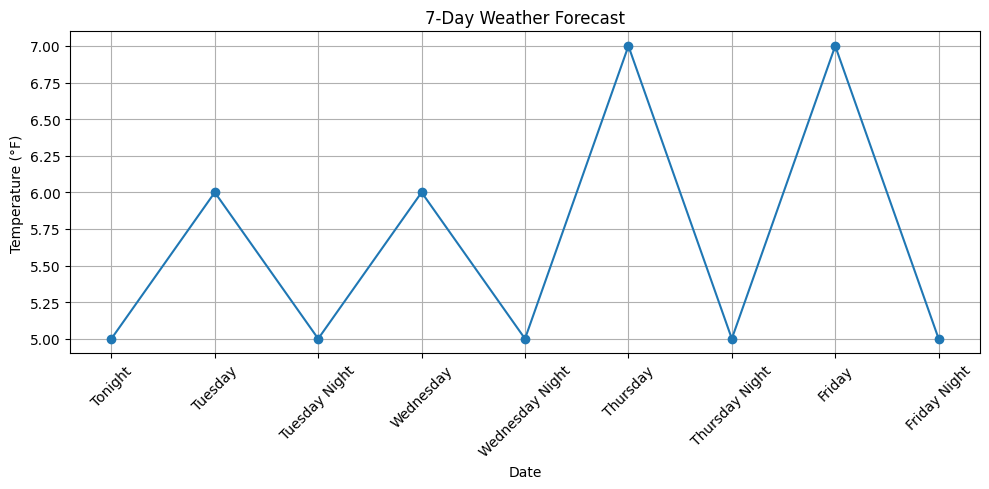

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve the web page content
url = "https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.XzpnT3UvNuQ"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Select a <div> with an id="seven-day-forecast"
seven_day_forecast_div = soup.find(id="seven-day-forecast")

# Step 3: Select and print all period_names in the <div> as a list
period_names = [item.get_text() for item in seven_day_forecast_div.select(".tombstone-container .period-name")]
print("Period Names:", period_names)

# Step 4: Select and print all short_descr in the <div> as a list
short_descr = [item.get_text() for item in seven_day_forecast_div.select(".tombstone-container .short-desc")]
print("Short Descriptions:", short_descr)

# Step 5: Select and print all Temperatures in the <div> as a list
temperatures = [item.get_text() for item in seven_day_forecast_div.select(".tombstone-container .temp")]
print("Temperatures:", temperatures)

# Step 6: Implement a dataframe of items shown in Illustration 1
data = {
    "Period": period_names,
    "Short Description": short_descr,
    "Temperature": temperatures
}
df = pd.DataFrame(data)
print(df)

# Step 7: Implement a graph of Dates(x-axis) against Temperature in Fahrenheits(y-axis)
# Extract temperatures in Fahrenheit
temperatures_fahrenheit = []
for temp in temperatures:
    temp_f = int(temp.split()[1][:-1])  # remove '°F' and convert to int
    temperatures_fahrenheit.append(temp_f)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(period_names, temperatures_fahrenheit, marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('7-Day Weather Forecast')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**JOINING DATAFRAMES**

In [ ]:
import pandas as pd
df_SN7577i_a = pd.read_csv("SN7577i_a.csv")
df_SN7577i_b = pd.read_csv("SN7577i_b.csv")
df_all_rows = pd.concat([df_SN7577i_a, df_SN7577i_b])
print(df_all_rows)
df_cd = pd.merge(df_SN7577i_a, df_SN7577i_b, how='inner', on = 'Id') #merge dataframes with a similar attributes

FileNotFoundError: [Errno 2] No such file or directory: 'SN7577i_a.csv'

**AUTOMOILE DATA EXERCISE**

In [ ]:
import pandas as pd
import numpy as np
#Print the first and last five rows and Replace all column values which contain ‘?’ and n.awith NaN.
Automobile_data = pd.read_csv("/Automobile_data.csv")
print(Automobile_data)
df = pd.DataFrame(Automobile_data)

#Replace all column values which contain ‘?’ and n.a with NaN.
df.replace(['?', 'n.a'], np.nan, inplace=True)

#print the first five rows
#df.iloc[0:5]
print("First five rows:")
print(df.head())

#print the last five rows
df.iloc[-5:]
#print("last five rows:")
#print(df.tail())

    index      company   body-style  wheel-base  length engine-type  \
0       0  alfa-romero  convertible        88.6   168.8        dohc   
1       1  alfa-romero  convertible        88.6   168.8        dohc   
2       2  alfa-romero    hatchback        94.5   171.2        ohcv   
3       3         audi        sedan        99.8   176.6         ohc   
4       4         audi        sedan        99.4   176.6         ohc   
..    ...          ...          ...         ...     ...         ...   
56     81   volkswagen        sedan        97.3   171.7         ohc   
57     82   volkswagen        sedan        97.3   171.7         ohc   
58     86   volkswagen        sedan        97.3   171.7         ohc   
59     87        volvo        sedan       104.3   188.8         ohc   
60     88        volvo        wagon       104.3   188.8         ohc   

   num-of-cylinders  horsepower  average-mileage    price  
0              four         111               21  13495.0  
1              four        

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


In [ ]:
# 2.Print most expensive car, company name and price
most_expensive_car = df.loc[df['price'].idxmax()]
#print(most_expensive_car)
print(f"Company: {most_expensive_car['company']}, Car: {most_expensive_car['body-style']}, Price: {most_expensive_car['price']}")

Company: mercedes-benz, Car: hardtop, Price: 45400.0


In [ ]:
#3. Count total cars per company
car_count_per_company = df['company'].value_counts()
print("\nTotal cars per company:")
print(car_count_per_company)





Total cars per company:
company
toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: count, dtype: int64

Total cars per company:
body-style
sedan          32
hatchback      15
wagon           9
convertible     3
hardtop         2
Name: count, dtype: int64


# Week 4

# Encode Data and Transform Data

In [ ]:
from sklearn.impute import SimpleImputer #
import pandas as pd
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['warm','hot','cold','luke warm','hot','cold','warm']
values = array(data) #for arrays
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
#Use inverse transform function to get the original values back
inverted = label_encoder.inverse_transform(integer_encoded)[:]
print(inverted)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)


['warm' 'hot' 'cold' 'luke warm' 'hot' 'cold' 'warm']
[3 1 0 2 1 0 3]
['warm' 'hot' 'cold' 'luke warm' 'hot' 'cold' 'warm']
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
['warm']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import numpy as np
df = pd.DataFrame({'A':[np.nan,13,14,15,16,np.nan],
                   'B':[12,np.nan,14,15,16,np.nan],
                   'C':[7,8,9,np.nan,12,np.nan],
                   'X':[19,4,6,np.nan,7,np.nan]})
print(df)

#Delete the row with NaN
#df.dropna(how = 'all')

#Drop any row with a missing value
#df.dropna(how ='any')

#Filling in the missing value with 0
#df.fillna(value=0)

#df['X']=df['X'].fillna(df['X'].mean()) Replacing the missing values in the colum X with the its mean

#df.fillna(method='ffill') #Forward fill
#df.fillna(method='bfill') #Backward fill

      A     B     C     X
0   NaN  12.0   7.0  19.0
1  13.0   NaN   8.0   4.0
2  14.0  14.0   9.0   6.0
3  15.0  15.0   NaN   NaN
4  16.0  16.0  12.0   7.0
5   NaN   NaN   NaN   NaN


,A,B,C,X
0,13.0,12.0,7.0,19.0
1,13.0,14.0,8.0,4.0
2,14.0,14.0,9.0,6.0
3,15.0,15.0,12.0,7.0
4,16.0,16.0,12.0,7.0
5,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(strategy='mean')

In [ ]:
a=imp.fit_transform(df)

In [ ]:
df = pd.DataFrame(a,columns=['A','B','C','X'])
df

,A,B,C,X
0,14.5,12.00,7.0,19.0
1,13.0,14.25,8.0,4.0
2,14.0,14.00,9.0,6.0
3,15.0,15.00,9.0,9.0
4,16.0,16.00,12.0,7.0
5,14.5,14.25,9.0,9.0


**Exercise**

In [ ]:
import numpy as np
import pandas as pd
T = np.linspace(0, 2*np.pi,25)
df = pd.DataFrame({'X':np.sin(T),
                   'X2': np.sin(T),
                   'Y': 0.5+np.random.randn(25)},
                  index = T)
df
df.iloc[5:12,0] = np.nan
df.loc[np.pi] = np.nan
df.iloc[::2,-1] = np.nan
print(df)

                     X            X2         Y
0.000000  0.000000e+00  0.000000e+00       NaN
0.261799  2.588190e-01  2.588190e-01 -0.463628
0.523599  5.000000e-01  5.000000e-01       NaN
0.785398  7.071068e-01  7.071068e-01 -0.107100
1.047198  8.660254e-01  8.660254e-01       NaN
1.308997           NaN  9.659258e-01  0.959656
1.570796           NaN  1.000000e+00       NaN
1.832596           NaN  9.659258e-01  1.067485
2.094395           NaN  8.660254e-01       NaN
2.356194           NaN  7.071068e-01  0.502778
2.617994           NaN  5.000000e-01       NaN
2.879793           NaN  2.588190e-01  1.653050
3.141593           NaN           NaN       NaN
3.403392 -2.588190e-01 -2.588190e-01 -0.684636
3.665191 -5.000000e-01 -5.000000e-01       NaN
3.926991 -7.071068e-01 -7.071068e-01  1.500068
4.188790 -8.660254e-01 -8.660254e-01       NaN
4.450590 -9.659258e-01 -9.659258e-01  0.777740
4.712389 -1.000000e+00 -1.000000e+00       NaN
4.974188 -9.659258e-01 -9.659258e-01  0.270110
5.235988 -8.6

In [ ]:
#1.
df.dropna(how = 'all')

,X,X2,Y
0.000000,0.000000e+00,0.000000e+00,NaN
0.261799,2.588190e-01,2.588190e-01,-0.463628
0.523599,5.000000e-01,5.000000e-01,NaN
0.785398,7.071068e-01,7.071068e-01,-0.107100
1.047198,8.660254e-01,8.660254e-01,NaN
1.308997,NaN,9.659258e-01,0.959656
1.570796,NaN,1.000000e+00,NaN
1.832596,NaN,9.659258e-01,1.067485
2.094395,NaN,8.660254e-01,NaN
2.356194,NaN,7.071068e-01,0.502778


In [ ]:
#2.
df['X'] = df['X'].interpolate(method='quadratic')


In [ ]:
#3.
df['Y']=df['Y'].fillna(df['Y'].mean())


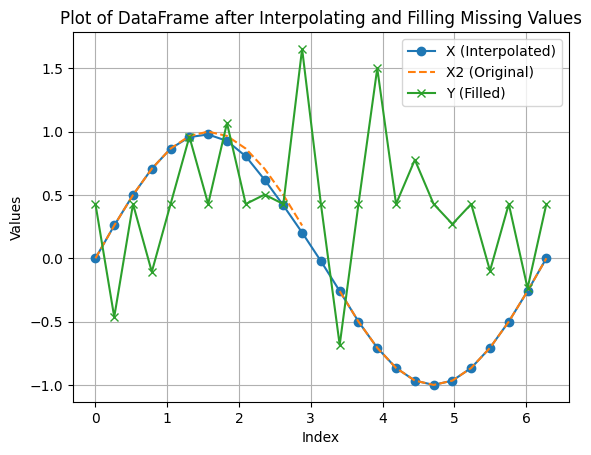

In [ ]:
#4.plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.plot(df.index, df['X'], label='X (Interpolated)', marker='o')
plt.plot(df.index, df['X2'], label='X2 (Original)', linestyle='--')
plt.plot(df.index, df['Y'], label='Y (Filled)', marker='x')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of DataFrame after Interpolating and Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

# HOUSING DATA EXAMPLE

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/housing.csv') #Load data

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info() #General info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts() #Categorical data thus we encode

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


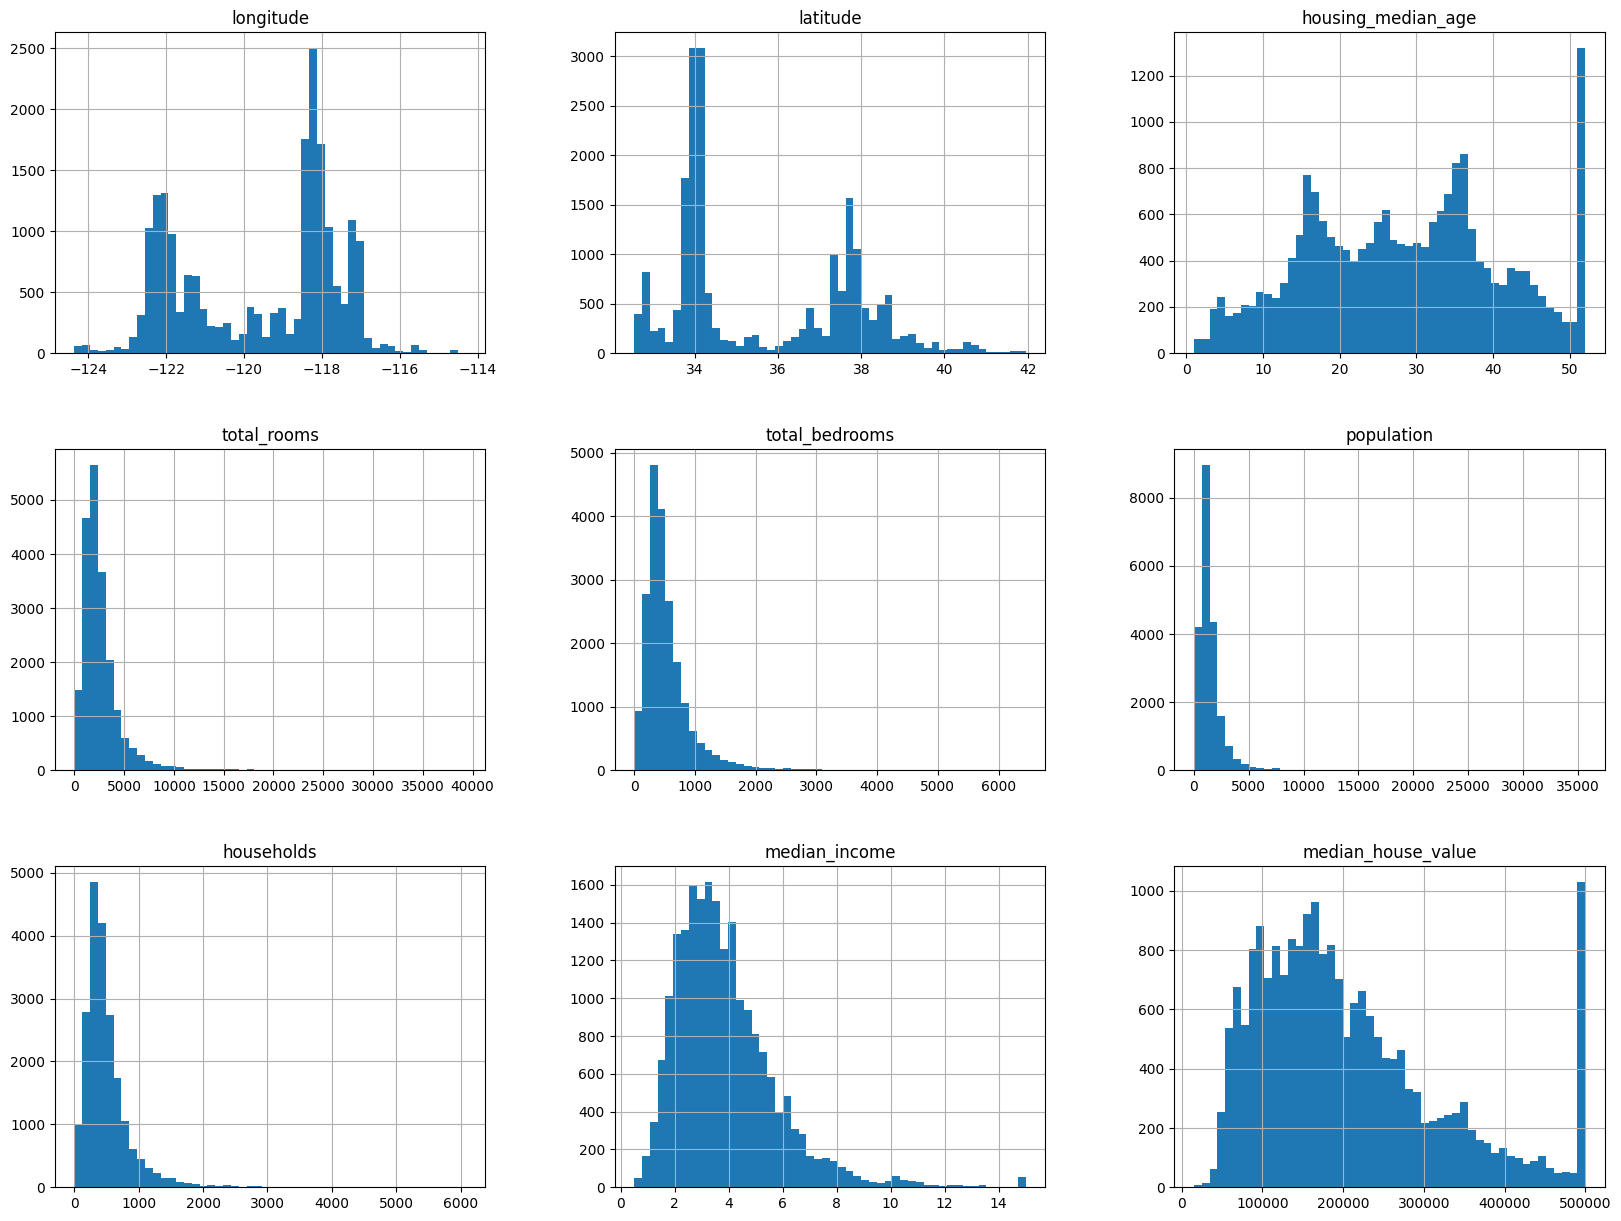

In [ ]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
housing=df
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

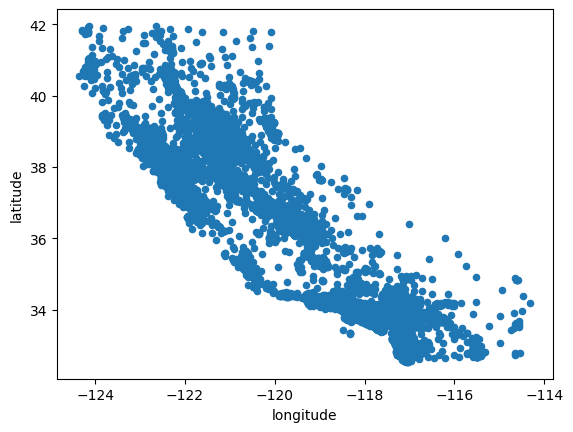

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

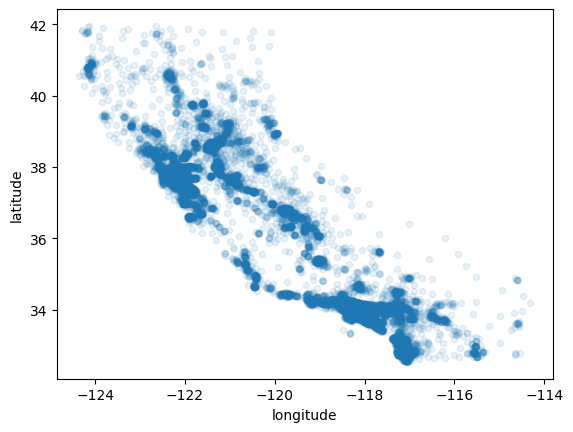

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

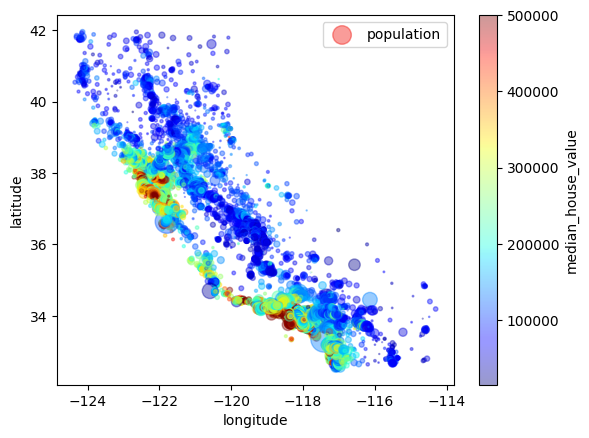

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend() #You can note that houses closer to the ocean are more expensive than those that are not close to the ocean, indicated by red

In [ ]:

# Option 1: Remove rows with non-numeric values
housing = housing[housing['longitude'].apply(lambda x: type(x) == float)]
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# Option 2: Convert the `longitude` column to a numeric data type
housing['longitude'] = housing['longitude'].apply(lambda x: float(x.replace('NEAR BAY', '0')))
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

ValueError: could not convert string to float: 'NEAR BAY'

In [ ]:
ocean = housing['ocean_proximity']
housing.drop('ocean_proximity', axis=1, inplace=True)

# ASSIGNMENT 1

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#1. Scrap the data and store the data into a python dataframe for analysis

url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'
page = requests.get(url)
page.status_code

200

In [ ]:
page.content
soup = BeautifulSoup(page.content, "html.parser")
#print(soup.prettify())


In [ ]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of presidents of the United States - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinn

In [ ]:
table = soup.find_all('table')[0]

In [ ]:
print(table)

<table class="wikitable sortable sticky-header" style="text-align:center;">
<caption><style data-mw-deduplicate="TemplateStyles:r1152813436">.mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}</style><span class="sr-only">List of presidents of the United States from 1789 – till date.</span>
</caption>
<tbody><tr>
<th scope="col"><abbr title="Number">No.</abbr><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup>
</th>
<th class="unsortable" scope="col">Portrait
</th>
<th scope="col">Name<br/><span style="font-size:85%;">(Birth–Death)</span>
</th>
<th class="unsortable" scope="col">Term<sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0"><a href="#cite_note-FOOTNOTELOCwhitehouse.gov-15">[14]</a></sup>
</th>
<th colspan="2" scope="col">Party<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[b]</

In [ ]:
world_titles = table.find_all('th')

In [ ]:
world_titles

[<th scope="col"><abbr title="Number">No.</abbr><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup>
 </th>,
 <th class="unsortable" scope="col">Portrait
 </th>,
 <th scope="col">Name<br/><span style="font-size:85%;">(Birth–Death)</span>
 </th>,
 <th class="unsortable" scope="col">Term<sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0"><a href="#cite_note-FOOTNOTELOCwhitehouse.gov-15">[14]</a></sup>
 </th>,
 <th colspan="2" scope="col">Party<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[b]</a></sup><sup class="reference" id="cite_ref-FOOTNOTE''Guide_to_U.S._Elections''2010257–258_17-0"><a href="#cite_note-FOOTNOTE''Guide_to_U.S._Elections''2010257–258-17">[15]</a></sup>
 </th>,
 <th class="unsortable" scope="col">Election
 </th>,
 <th class="unsortable" scope="col">Vice President<sup class="reference" id="cite_ref-FOOTNOTELOC_18-0"><a href="#cite_note-FOOTNOTELOC-18">[16]</a></sup>
 </th>,
 <th scope="row"><a href="/wiki/Presid

In [ ]:
world_table_titles = [title.text.strip().replace('\n','').replace('[a]', '').replace('[b]','').replace('[16]', '').replace('[15]','').replace('[14]','') for title in world_titles]
print(world_table_titles)

['No.', 'Portrait', 'Name(Birth–Death)', 'Term', 'Party', 'Election', 'Vice President', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']


In [ ]:
limited_titles = world_table_titles[:8]


In [ ]:
limited_titles

['No.',
 'Portrait',
 'Name(Birth–Death)',
 'Term',
 'Party',
 'Election',
 'Vice President',
 '1']

In [ ]:
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    row_data = row.find_all(['th', 'td'])
    individual_row_data = [data.text.strip().replace('\n\n', ' - ').replace('\n', ' ')
                          for data in row_data][:8]
    data.append(individual_row_data)


president_data = pd.DataFrame(data=data, columns=limited_titles)
president_data.dropna(inplace=True)
president_data

,No.,Portrait,Name(Birth–Death),Term,Party,Election,Vice President,1
0,1,,George Washington(1732–1799)[17],"April 30, 1789–March 4, 1797",,Unaffiliated,1788–1789 - 1792,John Adams[c]
1,2,,John Adams(1735–1826)[19],"March 4, 1797–March 4, 1801",,Federalist,1796,Thomas Jefferson[d]
2,3,,Thomas Jefferson(1743–1826)[21],"March 4, 1801–March 4, 1809",,Democratic-Republican,1800 - 1804,Aaron Burr - George Clinton
3,4,,James Madison(1751–1836)[22],"March 4, 1809–March 4, 1817",,Democratic-Republican,1808 - 1812,"George Clinton[e] - Vacant afterApril 20, 1812..."
4,5,,James Monroe(1758–1831)[24],"March 4, 1817–March 4, 1825",,Democratic-Republican,1816 - 1820,Daniel D. Tompkins
5,6,,John Quincy Adams(1767–1848)[25],"March 4, 1825–March 4, 1829",,Democratic-Republican[f] - National Republican,1824,John C. Calhoun[g]
6,7,,Andrew Jackson(1767–1845)[28],"March 4, 1829–March 4, 1837",,Democratic,1828 - 1832,"John C. Calhoun[h] - Vacant afterDecember 28, ..."
7,8,,Martin Van Buren(1782–1862)[29],"March 4, 1837–March 4, 1841",,Democratic,1836,Richard Mentor Johnson
8,9,,William Henry Harrison(1773–1841)[30],"March 4, 1841–April 4, 1841[e]",,Whig,1840,John Tyler
9,10,,John Tyler(1790–1862)[31],"April 4, 1841[i]–March 4, 1845",,Whig[j] - Unaffiliated,–,Vacant throughoutpresidency


**Question 2**

In [ ]:
#2. How many presidents are on the web page?

# Extract the president names from the 'Name' column
president_names = president_data['Name(Birth–Death)'].tolist()

# Remove any duplicate names
unique_president_names = set(president_names)

# Print the number of unique presidents
print(f"Number of presidents on the web page: {len(unique_president_names)}")

Number of presidents on the web page: 45


In [ ]:
#3. How many presidencies ever existed in the United states
total_presidencies = president_data['Name(Birth–Death)'].count()
print(f"Number of presidents on the web page: ", total_presidencies)

Number of presidents on the web page:  46


In [ ]:
#Clean the 'Name(Birth–Death)' column to separate name and lifespan
president_data[['Name', 'Lifespan']] = president_data['Name(Birth–Death)'].str.extract(r'^(.*?)\s*\((.*?)\)$')


In [ ]:
# Filter presidents who served more than one term and had only one vice president throughout their presidency
multi_term_presidents = president_data[president_data['Term'].str.contains('—')]


In [ ]:
# Filter presidents with only one vice president
single_vp_presidents = multi_term_presidents.groupby('Name').filter(lambda x: len(x['Vice President'].unique()) == 1)


In [ ]:
# List of presidents who served more than one term and had only one vice president
presidents_list = single_vp_presidents['Name'].unique()
print(presidents_list)

[]


In [ ]:
# Print the list of presidents
for president in presidents_list:
    print(president)

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Scrape the data and store it into a Python dataframe for analysis
url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

# Find the table containing the data
table = soup.find('table', {'class': 'wikitable'})

# Initialize lists to store data
numbers = []
portraits = []
names = []
years = []
terms = []
parties = []
elections = []
vice_presidents = []

# Iterate through each row in the table
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if len(cells) > 3:  # Check if the row has the expected number of columns
        # Extract and clean data for each column
        number = cells[0].get_text(strip=True)
        portrait = cells[1].find('img')['src'] if cells[1].find('img') else 'N/A'

        # Split the name and years
        name_and_years = cells[2].get_text(strip=True)
        name_parts = name_and_years.rsplit('(', 1)
        name = name_parts[0].strip()
        years = name_parts[1].strip(')') if len(name_parts) > 1 else 'N/A'

        term = cells[3].get_text(strip=True)
        party = cells[4].get_text(strip=True)
        election = cells[5].get_text(strip=True)
        vice_president = cells[6].get_text(strip=True)

        # Append data to respective lists
        numbers.append(number)
        portraits.append(portrait)
        names.append(name)
        years.append(years)
        terms.append(term)
        parties.append(party)
        elections.append(election)
        vice_presidents.append(vice_president)

# Create DataFrame
df = pd.DataFrame({
    "Number": numbers,
    "Portrait": portraits,
    "Name(Birth–Death)": names,
    "Years": years,
    "Term": terms,
    "Party": parties,
    "Election": elections,
    "Vice President": vice_presidents
})

# Clean data
df['Term'] = df['Term'].str.extract(r'(\d{4}–\d{4})')
df['Years'] = df['Years'].str.replace('–', '-')

# Find presidents who served more than one term and had only one vice president
def served_more_than_one_term(term):
    # Check if there are multiple non-overlapping terms
    terms = term.split(' ')
    return len(terms) > 1 and '-' in terms[-1]

df['MultipleTerms'] = df['Term'].apply(served_more_than_one_term)

# Filter presidents who served more than one term and had one vice president
presidents_multiple_terms = df[(df['MultipleTerms']) & (df['Vice President'].duplicated(keep=False))]
unique_presidents = presidents_multiple_terms.groupby('Name(Birth–Death)').filter(lambda x: len(x['Vice President'].unique()) == 1)

print(unique_presidents[['Name(Birth–Death)', 'Vice President', 'Term']])


AttributeError: 'str' object has no attribute 'append'

# **DISCUSION CLASS WK 5**#

In [ ]:
import pandas as pd
#import numpy as py
df = pd.read_excel('/content/WD_Data_all-COVID-19_Stellenbosch.xls') #Load data
df

,hospital_number,Na,K,k,Clin,hco3std,ventilation,ventilation_mode,HbA1c,Albumin,...,hiv_new_diag,immunodeficiency,tb_1,copd,ckd,hospital_number.1,venti,ag_n,ag,153
0,121265060,131.0,5.6,4.60,96.0,27.5,High Flow,NaN,NaN,NaN,...,2.0,1.0,2.0,1.0,1.0,121265060,Non-invasive,7.5,13.1,NaN
1,38461596,128.0,3.1,3.00,98.0,29.4,Other,NaN,6.3,NaN,...,1.0,1.0,2.0,1.0,1.0,38461596,Non-invasive,0.6,3.7,NaN
2,87594446,128.0,3.9,3.20,97.0,29.1,High Flow,NaN,12.1,NaN,...,1.0,1.0,2.0,1.0,1.0,87594446,Non-invasive,1.9,5.8,NaN
3,42450692,135.0,3.9,3.30,114.0,19.1,Other,NaN,NaN,NaN,...,1.0,1.0,2.0,1.0,1.0,42450692,Non-invasive,1.9,5.8,NaN
4,24941833,134.0,4.7,4.10,103.0,28.1,Other,NaN,6.6,NaN,...,NaN,1.0,2.0,1.0,1.0,24941833,Non-invasive,2.9,7.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,89012926,133.0,5.2,5.20,94.0,NaN,Intubated,p-simv,NaN,NaN,...,NaN,1.0,2.0,1.0,2.0,89012926,Invasive,NaN,NaN,NaN
486,54123211,137.0,5.3,4.21,106.0,NaN,Other,NaN,NaN,NaN,...,NaN,1.0,2.0,1.0,1.0,54123211,Non-invasive,NaN,NaN,NaN
487,40583361,140.0,4.1,NaN,99.0,NaN,Intubated,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40583361,Invasive,NaN,NaN,NaN
488,45449568,NaN,NaN,4.20,NaN,NaN,Intubated,p-simv,NaN,NaN,...,NaN,1.0,2.0,1.0,1.0,45449568,Invasive,NaN,NaN,NaN


In [ ]:
covid_df= df.dropna(thresh=245, axis=1)
covid_df


,hospital_number,Na,K,k,Clin,hco3std,ventilation,HbA1c,ALT,Basophils,...,ptld,hiv_status_1,immunodeficiency,tb_1,copd,ckd,hospital_number.1,venti,ag_n,ag
0,121265060,131.0,5.6,4.60,96.0,27.5,High Flow,NaN,52.0,0.02,...,1.0,2.0,1.0,2.0,1.0,1.0,121265060,Non-invasive,7.5,13.1
1,38461596,128.0,3.1,3.00,98.0,29.4,Other,6.3,13.0,0.04,...,1.0,2.0,1.0,2.0,1.0,1.0,38461596,Non-invasive,0.6,3.7
2,87594446,128.0,3.9,3.20,97.0,29.1,High Flow,12.1,42.0,0.05,...,1.0,2.0,1.0,2.0,1.0,1.0,87594446,Non-invasive,1.9,5.8
3,42450692,135.0,3.9,3.30,114.0,19.1,Other,NaN,118.0,0.08,...,1.0,2.0,1.0,2.0,1.0,1.0,42450692,Non-invasive,1.9,5.8
4,24941833,134.0,4.7,4.10,103.0,28.1,Other,6.6,36.0,0.01,...,1.0,1.0,1.0,2.0,1.0,1.0,24941833,Non-invasive,2.9,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,89012926,133.0,5.2,5.20,94.0,NaN,Intubated,NaN,7.0,0.02,...,1.0,1.0,1.0,2.0,1.0,2.0,89012926,Invasive,NaN,NaN
486,54123211,137.0,5.3,4.21,106.0,NaN,Other,NaN,50.0,0.02,...,1.0,1.0,1.0,2.0,1.0,1.0,54123211,Non-invasive,NaN,NaN
487,40583361,140.0,4.1,NaN,99.0,NaN,Intubated,NaN,2948.0,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,40583361,Invasive,NaN,NaN
488,45449568,NaN,NaN,4.20,NaN,NaN,Intubated,NaN,NaN,NaN,...,1.0,NaN,1.0,2.0,1.0,1.0,45449568,Invasive,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
# We are imputing the missing values in a categorical column with the mode of the column
# and in a numerical column with the mean of the column
imputer_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
covid_df[numerical_cols] = imputer_numeric.fit_transform(covid_df[numerical_cols])
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
covid_df[categorical_cols] = imputer_categorical.fit_transform(covid_df[categorical_cols])
covid_df

<ipython-input-34-5bfc2b16eeee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[numerical_cols] = imputer_numeric.fit_transform(covid_df[numerical_cols])
<ipython-input-34-5bfc2b16eeee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[categorical_cols] = imputer_categorical.fit_transform(covid_df[categorical_cols])


,hospital_number,Na,K,k,Clin,hco3std,ventilation,HbA1c,ALT,Basophils,...,ptld,hiv_status_1,immunodeficiency,tb_1,copd,ckd,hospital_number.1,venti,ag_n,ag
0,121265060.0,131.000000,5.600000,4.600000,96.000000,27.500000,High Flow,8.011765,52.000000,0.02000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,121265060.0,Non-invasive,7.500000,13.100000
1,38461596.0,128.000000,3.100000,3.000000,98.000000,29.400000,Other,6.300000,13.000000,0.04000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,38461596.0,Non-invasive,0.600000,3.700000
2,87594446.0,128.000000,3.900000,3.200000,97.000000,29.100000,High Flow,12.100000,42.000000,0.05000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,87594446.0,Non-invasive,1.900000,5.800000
3,42450692.0,135.000000,3.900000,3.300000,114.000000,19.100000,Other,8.011765,118.000000,0.08000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,42450692.0,Non-invasive,1.900000,5.800000
4,24941833.0,134.000000,4.700000,4.100000,103.000000,28.100000,Other,6.600000,36.000000,0.01000,...,1.0,1.000000,1.000000,2.000000,1.000000,1.00000,24941833.0,Non-invasive,2.900000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,89012926.0,133.000000,5.200000,5.200000,94.000000,26.064269,Intubated,8.011765,7.000000,0.02000,...,1.0,1.000000,1.000000,2.000000,1.000000,2.00000,89012926.0,Invasive,12.836885,17.239891
486,54123211.0,137.000000,5.300000,4.210000,106.000000,26.064269,Other,8.011765,50.000000,0.02000,...,1.0,1.000000,1.000000,2.000000,1.000000,1.00000,54123211.0,Non-invasive,12.836885,17.239891
487,40583361.0,140.000000,4.100000,3.824459,99.000000,26.064269,Intubated,8.011765,2948.000000,0.14000,...,1.0,1.137056,1.006438,1.991416,1.028017,1.04086,40583361.0,Invasive,12.836885,17.239891
488,45449568.0,137.201245,4.437448,4.200000,98.574257,26.064269,Intubated,8.011765,64.310044,0.10546,...,1.0,1.137056,1.000000,2.000000,1.000000,1.00000,45449568.0,Invasive,12.836885,17.239891


**Imputation**

In [ ]:
# We are imputing the missing values in a categorical column with the mode of the column
# and in a numerical column with the mean of the column
'''numerical_cols = covid_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = covid_df.select_dtypes(include=['object']).columns

covid_df[numerical_cols] = covid_df[numerical_cols].fillna(covid_df[numerical_cols].mean())
covid_df[categorical_cols] = covid_df[categorical_cols].fillna(covid_df[categorical_cols].mode().iloc[0])
covid_df'''



<ipython-input-26-9045169317e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[numerical_cols] = covid_df[numerical_cols].fillna(covid_df[numerical_cols].mean())
<ipython-input-26-9045169317e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[categorical_cols] = covid_df[categorical_cols].fillna(covid_df[categorical_cols].mode().iloc[0])


,hospital_number,Na,K,k,Clin,hco3std,ventilation,HbA1c,ALT,Basophils,...,ptld,hiv_status_1,immunodeficiency,tb_1,copd,ckd,hospital_number.1,venti,ag_n,ag
0,121265060,131.000000,5.600000,4.600000,96.000000,27.500000,High Flow,8.011765,52.000000,0.02000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,121265060,Non-invasive,7.500000,13.100000
1,38461596,128.000000,3.100000,3.000000,98.000000,29.400000,Other,6.300000,13.000000,0.04000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,38461596,Non-invasive,0.600000,3.700000
2,87594446,128.000000,3.900000,3.200000,97.000000,29.100000,High Flow,12.100000,42.000000,0.05000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,87594446,Non-invasive,1.900000,5.800000
3,42450692,135.000000,3.900000,3.300000,114.000000,19.100000,Other,8.011765,118.000000,0.08000,...,1.0,2.000000,1.000000,2.000000,1.000000,1.00000,42450692,Non-invasive,1.900000,5.800000
4,24941833,134.000000,4.700000,4.100000,103.000000,28.100000,Other,6.600000,36.000000,0.01000,...,1.0,1.000000,1.000000,2.000000,1.000000,1.00000,24941833,Non-invasive,2.900000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,89012926,133.000000,5.200000,5.200000,94.000000,26.064269,Intubated,8.011765,7.000000,0.02000,...,1.0,1.000000,1.000000,2.000000,1.000000,2.00000,89012926,Invasive,12.836885,17.239891
486,54123211,137.000000,5.300000,4.210000,106.000000,26.064269,Other,8.011765,50.000000,0.02000,...,1.0,1.000000,1.000000,2.000000,1.000000,1.00000,54123211,Non-invasive,12.836885,17.239891
487,40583361,140.000000,4.100000,3.824459,99.000000,26.064269,Intubated,8.011765,2948.000000,0.14000,...,1.0,1.137056,1.006438,1.991416,1.028017,1.04086,40583361,Invasive,12.836885,17.239891
488,45449568,137.201245,4.437448,4.200000,98.574257,26.064269,Intubated,8.011765,64.310044,0.10546,...,1.0,1.137056,1.000000,2.000000,1.000000,1.00000,45449568,Invasive,12.836885,17.239891


**Encoding the data and transform it to an array**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(covid_df)# you'll have to encode and transform it to an array
# Also, check for columns that you will not need and drop them. Like the column dates


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Split the data into train/test**

# **REGRESSION**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/sample_data/housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


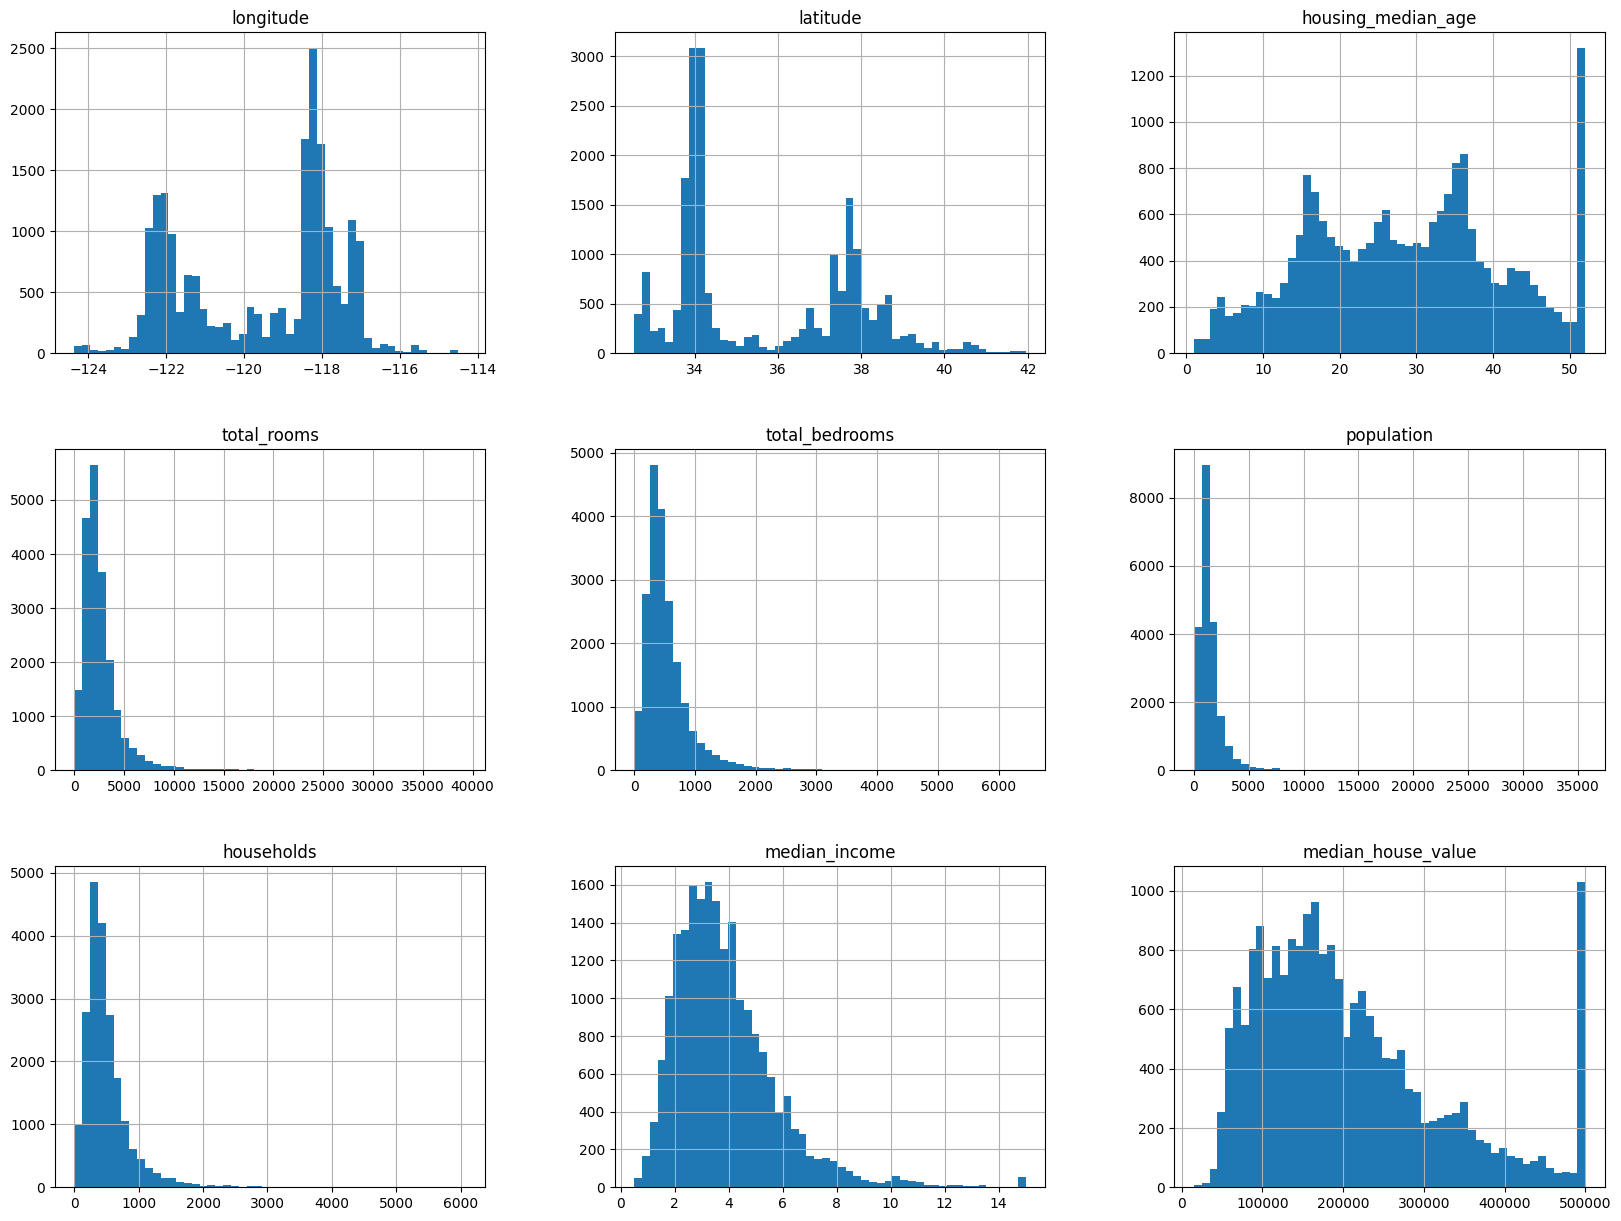

In [ ]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
housing=df

<Axes: xlabel='longitude', ylabel='latitude'>

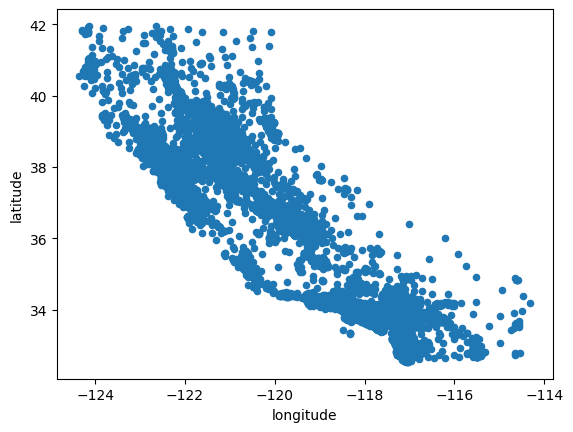

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<Axes: xlabel='longitude', ylabel='latitude'>

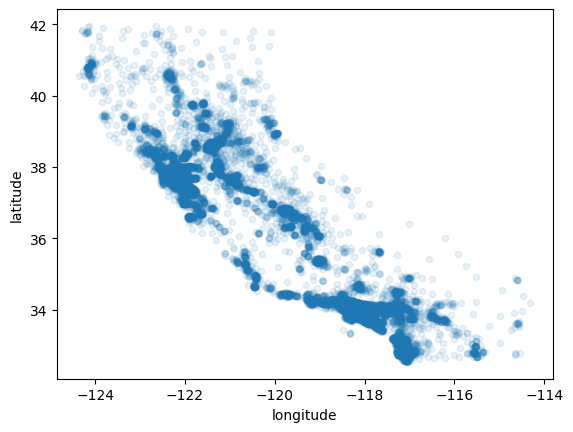

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

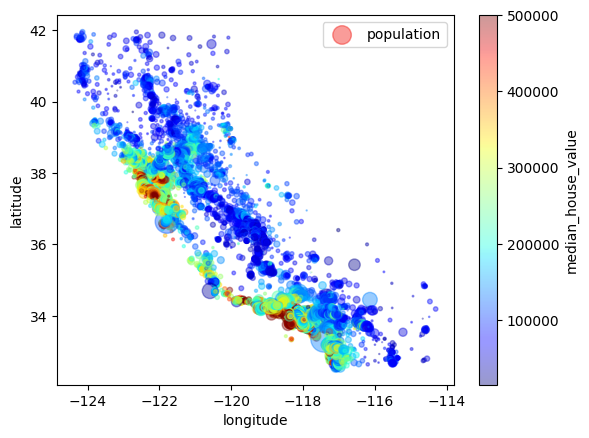

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

In [ ]:
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'])
corr_matrix = housing_encoded.corr()
print(corr_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

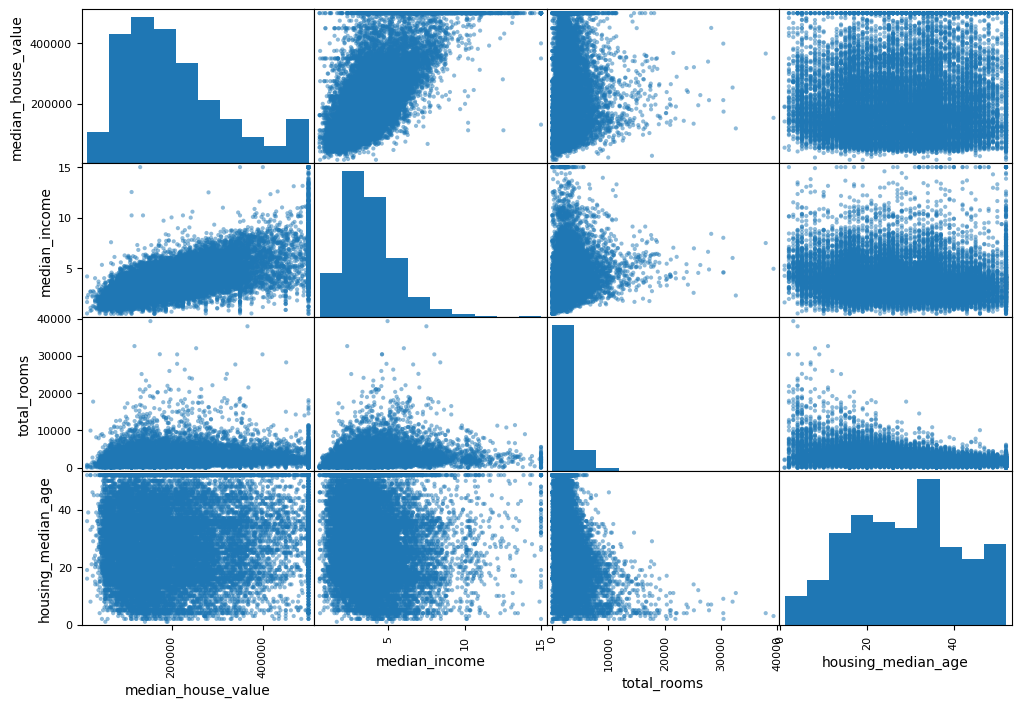

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))



In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_house"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'])
corr_matrix = housing_encoded.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_house           -0.255880
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_house        20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
numeric=housing.select_dtypes(include=np.number)

In [ ]:
non_num=housing.select_dtypes(include=['object'])

In [ ]:
imp = IterativeImputer(max_iter=1, random_state=0)
imp.fit(numeric)
imputed_numeric=np.round(imp.transform(numeric))
numeric_data=pd.DataFrame(imputed_numeric, columns=numeric.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
numeric_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_house,population_per_household
0,-122.0,38.0,41.0,880.0,129.0,322.0,126.0,8.0,452600.0,7.0,0.0,3.0
1,-122.0,38.0,21.0,7099.0,1106.0,2401.0,1138.0,8.0,358500.0,6.0,0.0,2.0
2,-122.0,38.0,52.0,1467.0,190.0,496.0,177.0,7.0,352100.0,8.0,0.0,3.0
3,-122.0,38.0,52.0,1274.0,235.0,558.0,219.0,6.0,341300.0,6.0,0.0,3.0
4,-122.0,38.0,52.0,1627.0,280.0,565.0,259.0,4.0,342200.0,6.0,0.0,2.0


In [ ]:
housing=pd.concat([numeric_data,non_num],axis=1)

In [ ]:
X=housing.drop(['ocean_proximity','median_house_value'],axis=1)

In [ ]:
ocean=housing['ocean_proximity']

In [ ]:
y=housing['median_house_value']

In [ ]:
ocean=pd.get_dummies(ocean,prefix='ocean_')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,population_per_household
0,-122.0,38.0,41.0,880.0,129.0,322.0,126.0,8.0,7.0,0.0,3.0
1,-122.0,38.0,21.0,7099.0,1106.0,2401.0,1138.0,8.0,6.0,0.0,2.0
2,-122.0,38.0,52.0,1467.0,190.0,496.0,177.0,7.0,8.0,0.0,3.0
3,-122.0,38.0,52.0,1274.0,235.0,558.0,219.0,6.0,6.0,0.0,3.0
4,-122.0,38.0,52.0,1627.0,280.0,565.0,259.0,4.0,6.0,0.0,2.0


In [ ]:
X_scaled=sc.fit_transform(X)

In [ ]:
X=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X=pd.concat([X,ocean],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2, random_state=42) #size of the test test is 20% and the random state represents
#  randomization of the data

In [ ]:
Ytrain.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [ ]:
Ytrain.shape

(16512,)

In [50]:
Ytest.shape

(4128,)

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [52]:
lin_reg.fit(Xtrain, Ytrain) #fit function is a training function


LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
housing_predictions = lin_reg.predict(Xtest)  #We are predicting the y values


In [58]:
#  NB
Xtrain.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_house', 'population_per_household',
       'ocean__<1H OCEAN', 'ocean__INLAND', 'ocean__ISLAND', 'ocean__NEAR BAY',
       'ocean__NEAR OCEAN'],
      dtype='object')

In [59]:
#Determining the equtation of the function by getting the coefficients of the variables x and the intercept
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_
print( intercept)
print( coefficients)

242439.72042442326
[-33964.29832342 -35762.56599134  15127.63919253 -11515.52385635
  26446.74173747 -45288.47296379  36114.24977685  71967.90047695
   4897.04088027   3281.96756864    798.00777174 -21058.43218997
 -72517.63315898 121838.0220697  -17279.0677413  -10982.88897945]


Using the MSE, MAE and RMSE to

In [62]:
lin_mse = mean_squared_error(Ytest, housing_predictions)
print("Mean Squared Error: ", lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(" Root Mean Squared Error: ", lin_rmse)

Mean Squared Error:  5012609816.253653
 Root Mean Squared Error:  70799.78683762864


In [47]:
mean_absolute_error(Ytest, housing_predictions)

51479.80226382134

In [63]:
R2_score = r2_score(Ytest, housing_predictions)
print("R2 Score: ", R2_score)

R2 Score:  0.6174774517355179


**Polynomial Regression**

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=1)
X_poly_train = poly_features.fit_transform(Xtrain)
X_poly_test = poly_features.fit_transform(Xtest)
#Train the model
model = LinearRegression()
model.fit(X_poly_train, Ytrain)
#Test the model
housing_predictions = model.predict(X_poly_test)

In [72]:
print(mean_absolute_error(Ytest, housing_predictions))
print(mean_squared_error(Ytest, housing_predictions))
print(np.sqrt(mean_squared_error(Ytest, housing_predictions)))
print(r2_score(Ytest, housing_predictions))

51436.91957364341
5011594582.756783
70792.61672488722
0.6175549262884039


**Gradient Decent Algorithm**

In [74]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(Xtrain, Ytrain)

#Test model
housing_predictions = model.predict(Xtest)


In [75]:
print(mean_absolute_error(Ytest, housing_predictions))
print(mean_squared_error(Ytest, housing_predictions))
print(np.sqrt(mean_squared_error(Ytest, housing_predictions)))
print(r2_score(Ytest, housing_predictions))

6275760.635084803
185656234726754.28
13625572.821968047
-14166.80850936936


Regularized Models

In [76]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso

In [77]:
model = Ridge()
model.fit(Xtrain, Ytrain)
housing_predictions = model.predict(Xtest)


In [78]:
print(mean_absolute_error(Ytest, housing_predictions))
print(mean_squared_error(Ytest, housing_predictions))
print(np.sqrt(mean_squared_error(Ytest, housing_predictions)))
print(r2_score(Ytest, housing_predictions))

51487.27479983658
5013520637.487768
70806.21891816967
0.617407945096809


Decision Tree Regression model

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=15)# Pass different parameters to see which one works best

In [85]:
dtree.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=10)

In [86]:
housing_predictions = dtree.predict(Xtest)
print(mean_absolute_error(Ytest, housing_predictions))
print(mean_squared_error(Ytest, housing_predictions))
print(np.sqrt(mean_squared_error(Ytest, housing_predictions)))
print(r2_score(Ytest, housing_predictions))

43350.913143934944
4273311810.6345253
65370.57297159422
0.6738948006620771
